# NetworkX exercise 

In [1]:
%matplotlib inline
import networkx as nx
import vis_bel
import os
import pickle
import imp
import numpy as np
import itertools as itt

In [2]:
base = os.environ['BUG_FREE_EUREKA_BASE']
path_networkx_AD_pickled =os.path.join(base,'data','exercise05','networkx.graph.AD.pickled')

## Loading Alzheimer's disease network into networkX graph with pickle

In [3]:
graph_AD = pickle.load(open(path_networkx_AD_pickled,'rb'))

Here some words about [pickle](https://docs.python.org/3/library/pickle.html)

### Explore

In [4]:
len(graph_AD),len(graph_AD.nodes()), graph_AD.number_of_nodes()  # number of nodes

(11927, 11927, 11927)

In [5]:
graph_AD.number_of_edges() # number of nodes

59408

In [6]:
graph_AD[1] # node 1 connections with edge information

{2: {0: {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'},
  1: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'}},
 1828: {0: {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   '

In [7]:
graph_AD[1].keys() # nodes ids connected to node 1 

dict_keys([2, 1828])

In [8]:
graph_AD[1][2].keys()

dict_keys([0, 1])

In [9]:
graph_AD[1][2][0].get('rel')

'decreases'

In [10]:
graph_AD.nodes()[:2] # all nodes

[1, 2]

In [11]:
graph_AD.nodes(data=True)[:2]

[(1,
  {'BEL': 'a(CHEBI:"gamma-secretase inhibitor")',
   'function': 'a',
   'namespace': 'CHEBI',
   'value': 'gamma-secretase inhibitor'}),
 (2,
  {'BEL': 'complex(SCOMP:"gamma Secretase Complex")',
   'function': 'complex',
   'namespace': 'SCOMP',
   'value': '"gamma Secretase Complex"'})]

In [13]:
graph_AD.edges()[:2]

[(1, 2), (1, 2)]

In [17]:
graph_AD.edges(data=True,keys=True)[:2]

[(1,
  2,
  0,
  {'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'),
   'citation': ('Other', 'Connectors', '123'),
   'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.',
   'object_activity': 'act',
   'rel': 'decreases'}),
 (1,
  2,
  1,
  {'DiseaseState': ('Mild AD',),
   'FDASTATUS': ('Phase 3',),
   'Subgraph': ('Notch pathway', 'Gamma secretase pathway'),
   'citation': ('PubMed', 'Curr Med Chem. 2011;18(35):5430-47', '22087836'),
   'evidence': 'gamma-Secretase inhibitor believed to be associated with the inhibition of the cleavage of Notch, a transmembrane receptor involved in regulating cell-fate decisions.',
   'object_activity': 'pep',
   'rel': 'decreases'})]

In [ ]:
#nodes = np.random.choice(graph,size=100,replace=False)


In [14]:
nodes = set(itt.chain.from_iterable((formN,toN) for formN,toN  in graph_AD.edges()[:100]))

In [15]:
graph_100 = graph_AD.subgraph(nodes)

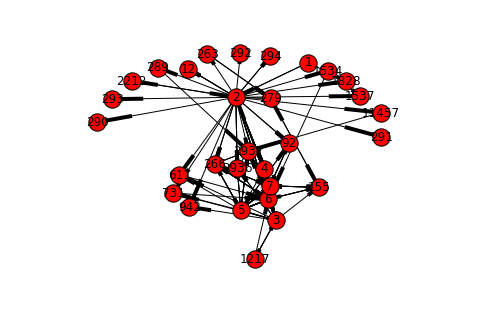

In [18]:
nx.draw_spring(graph_100,with_labels=True)

In [40]:
imp.reload(vis_bel)
vis_bel.draw(graph_100)


In [21]:
for u,v,k,a in graph_100.edges_iter(data=True,keys=True):
    print(u, v, k, a)
    break

1 2 0 {'rel': 'decreases', 'object_activity': 'act', 'Subgraph': ('Non-amyloidogenic pathway', 'Gamma secretase pathway'), 'evidence': 'The statements inside this citation is included to connect two entity types or triples, which will exist as islands/subnetworks in the big model.', 'citation': ('Other', 'Connectors', '123')}


## Tasks

0. Find the node with the highest degree in graph_100
0. get all distinct attribute keys in nodes and edges for graph_100
0. Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional
0. Find shortest paths between all nodes link to the edges found in the previsious task and create a new graph, dosplay it 

**hint** : Write a function which allows you to search all edges in the graph_100 with any key (or key/value). Allow value to be optional

In [ ]:
def find_edge_by_attrib_key_value(graph,attribKey,attribValue=None):
    return edge_list
find_edge_by_attrib_key_value(graph_100,'Subgraph')

In [25]:
def h_degree(graph):
    return [n for n,d in graph.degree_iter() if max(d for n,d in graph.degree_iter()) == d]

print (*h_degree(graph_100))

6


In [36]:
keys_list = []
for edge in graph_100.edges(data=True,keys=True):
    for elem in edge:
        if isinstance(elem, dict):
            for k, v in elem.items():
                if k not in keys_list:
                    keys_list.append(k)

print(keys_list)

['rel', 'object_activity', 'Subgraph', 'evidence', 'citation', 'FDASTATUS', 'DiseaseState', 'subject_activity', 'FluidAndSecretion', 'NervousSystem', 'CellStructure', 'MeSHDisease', 'UserdefinedCellLine', 'DigestiveSystem', 'Species', 'Cell', 'subject_translocation_to_namespace', 'subject_translocation', 'subject_translocation_to_value', 'subject_translocation_from_value', 'subject_translocation_from_namespace', 'UserdefinedSpecies', 'CellLine', 'UserdefinedGender', 'Duration_of_Chemical_Exposure', 'Developmental_Phase__of_patient', 'Encode_Feature_Types', 'object_translocation', 'object_translocation_from_value', 'object_translocation_to_namespace', 'object_translocation_from_namespace', 'object_translocation_to_value', 'CardiovascularSystem', 'Tissue']


In [39]:
def get_attrib_keys(graph):
    nodes_keys = []
    edges_keys = []
    for node in graph.nodes(data=True):
        for elem1 in node:
            if isinstance(elem1, dict):
                for k, v in elem1.items():
                    if k not in nodes_keys:
                        nodes_keys.append(k)
    for edge in graph.edges(data=True,keys=True):
        for elem2 in edge:
            if isinstance(elem2, dict):
                for k, v in elem2.items():
                    if k not in edges_keys:
                        edges_keys.append(k)
    all_keys = nodes_keys + edges_keys
    return all_keys

get_attrib_keys(graph_100)
    

['function',
 'namespace',
 'BEL',
 'value',
 'valid_NSV',
 'list',
 'rel',
 'object_activity',
 'Subgraph',
 'evidence',
 'citation',
 'FDASTATUS',
 'DiseaseState',
 'subject_activity',
 'FluidAndSecretion',
 'NervousSystem',
 'CellStructure',
 'MeSHDisease',
 'UserdefinedCellLine',
 'DigestiveSystem',
 'Species',
 'Cell',
 'subject_translocation_to_namespace',
 'subject_translocation',
 'subject_translocation_to_value',
 'subject_translocation_from_value',
 'subject_translocation_from_namespace',
 'UserdefinedSpecies',
 'CellLine',
 'UserdefinedGender',
 'Duration_of_Chemical_Exposure',
 'Developmental_Phase__of_patient',
 'Encode_Feature_Types',
 'object_translocation',
 'object_translocation_from_value',
 'object_translocation_to_namespace',
 'object_translocation_from_namespace',
 'object_translocation_to_value',
 'CardiovascularSystem',
 'Tissue']